In [214]:
# https://www.youtube.com/watch?v=vtm35gVP8JU
# HOUSE pRicing


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
# MSZoning : 5 categ ft
# Street : Pave    1454 | Grvl       6
# LandContour : 4 categ feature  
# MiscVal : continuous, no NaN
# SaleType : 9categ ft, no NaN [map 4 ft, other:0 ]
# SaleCondition : 6 categ ft, no NaN
# LotFrontage : 259 isnull
# FireplaceQu : 5 categ ft
# GarageType : 6 categ ft, 81 NaN

# Alley:  categ 이름: street과 비슷 & 대부분 NaN-- > DROP
# PoolQC' : 1453 NaN 
# MiscFeature : 1406 NaN



In [78]:
df['LotConfig'].isnull().sum()
# df['GarageType'].value_counts()

0

In [18]:
df.shape

(1460, 81)

In [77]:
# df.info()

In [97]:
for i,n in enumerate(df.isnull().sum()):
    if(n!=0):
        print(df.columns[i],' : ',n)


LotFrontage  :  259
Alley  :  1369
MasVnrType  :  8
MasVnrArea  :  8
BsmtQual  :  37
BsmtCond  :  37
BsmtExposure  :  38
BsmtFinType1  :  37
BsmtFinType2  :  38
Electrical  :  1
FireplaceQu  :  690
GarageType  :  81
GarageYrBlt  :  81
GarageFinish  :  81
GarageQual  :  81
GarageCond  :  81
PoolQC  :  1453
Fence  :  1179
MiscFeature  :  1406


# Preprocessing


In [148]:
df.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [124]:
df1.columns

Index(['Id', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SaleType',
       'SaleCo

In [241]:

# MSZoning : 5 categ ft
# Street : Pave    1454 | Grvl       6
# LandContour : 4 categ feature  
# MiscVal : continuous, no NaN
# SaleType : 9categ ft, no NaN [map 4 ft, other:0 ]
# SaleCondition : 6 categ ft, no NaN
# LotFrontage : 259 isnull

# Alley:  categ 이름: street과 비슷 & 대부분 NaN-- > DROP
# PoolQC' : 1453 NaN 
# MiscFeature : 1406 NaN

def ft_preprocessing_func(df):
    df1 = df.copy()
   
    # drop ft which has a lot of NaN 
    df1.drop(['BldgType','FireplaceQu','Condition2','LandContour','Utilities','Street','MSZoning','Alley','BsmtFullBath','PoolQC','MiscFeature','Fence','KitchenAbvGr','EnclosedPorch','YrSold','OverallCond','MSSubClass','GarageArea','GarageYrBlt','TotRmsAbvGrd','1stFlrSF'], axis = 1, inplace= True)
    
    
    # Mapping  [SaleCondition]
    sale_mapping = {'Normal': 0  , 'Partial':1,  'Abnorml':2, 'Family':3, 'Alloca':4,  'AdjLand':5}
    df1['SaleCondition'] = df1['SaleCondition'].map(sale_mapping)
    df1['Condition1'] = df1['Condition1'].map({'Norm':0, 'Feedr':1, 'Artery':2,'RRAn':3,'PosN':4, 'RRAe':5,'PosA':5,'RRNn':5,'RRNe':5})
    
    saleType_mapping = {'WD':0, 'New':1, 'COD':2,'ConLD':3,'ConLw':3, 'ConLI':3,'CWD':3,'Oth':3,'Con':3}
    df1['SaleType'] = df1['SaleType'].map(saleType_mapping)
    
    df1['LotShape'] = df1['LotShape'].map({'Reg':0, 'IR1':1, 'IR2':2,'IR3':3})
    df1['LotConfig'] = df1['LotConfig'].map({'Inside':0, 'Corner':1, 'CulDSac':2,'FR2':3,'FR3':3})
    df1['LandSlope'] = df1['LandSlope'].map({'Gtl':0, 'Mod':1, 'Sev':2})
    df1['HouseStyle'] = df1['HouseStyle'].map({'1Story':0, '2Story':1, '1.5Fin':2,'SLvl':3,'SFoyer':4,'1.5Unf':5,'2.5Unf':6,'2.5Fin':7})
    df1['MasVnrType'] = df1['MasVnrType'].map({'None':0, 'BrkFace':1, 'Stone':2,'BrkCmn':3})
    
    
    
    ## Feature Engineering 
    df1['LotFrontage'] = df1['LotFrontage'].fillna(df1.LotFrontage.mean())
    df1['MasVnrType'] = df1['MasVnrType'].fillna(df1.MasVnrType.mean())
    df1['MasVnrArea'] = df1['MasVnrArea'].fillna(df1.MasVnrType.mean())

    
    return df1


In [242]:
df1.MasVnrType.mean()

0.5137741046831956

In [243]:
df.BldgType.isnull().sum()

0

In [244]:
df1 = ft_preprocessing_func(df)
df1.head()

,Id,LotFrontage,LotArea,LotShape,LotConfig,LandSlope,Neighborhood,Condition1,HouseStyle,OverallQual,...,WoodDeckSF,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,1,65.0,8450,0,0,0,CollgCr,0,1,7,...,0,61,0,0,0,0,2,0,0,208500
1,2,80.0,9600,0,3,0,Veenker,1,0,6,...,298,0,0,0,0,0,5,0,0,181500
2,3,68.0,11250,1,0,0,CollgCr,0,1,7,...,0,42,0,0,0,0,9,0,0,223500
3,4,60.0,9550,1,1,0,Crawfor,0,1,7,...,0,35,0,0,0,0,2,0,2,140000
4,5,84.0,14260,1,3,0,NoRidge,0,1,8,...,192,84,0,0,0,0,12,0,0,250000


In [245]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   int64  
 4   LotConfig      1460 non-null   int64  
 5   LandSlope      1460 non-null   int64  
 6   Neighborhood   1460 non-null   object 
 7   Condition1     1460 non-null   int64  
 8   HouseStyle     1460 non-null   int64  
 9   OverallQual    1460 non-null   int64  
 10  YearBuilt      1460 non-null   int64  
 11  YearRemodAdd   1460 non-null   int64  
 12  RoofStyle      1460 non-null   object 
 13  RoofMatl       1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1460 non-null   float64
 17  MasVnrArea     1460 non-null   float64
 18  ExterQua

## Correlation

<AxesSubplot:>

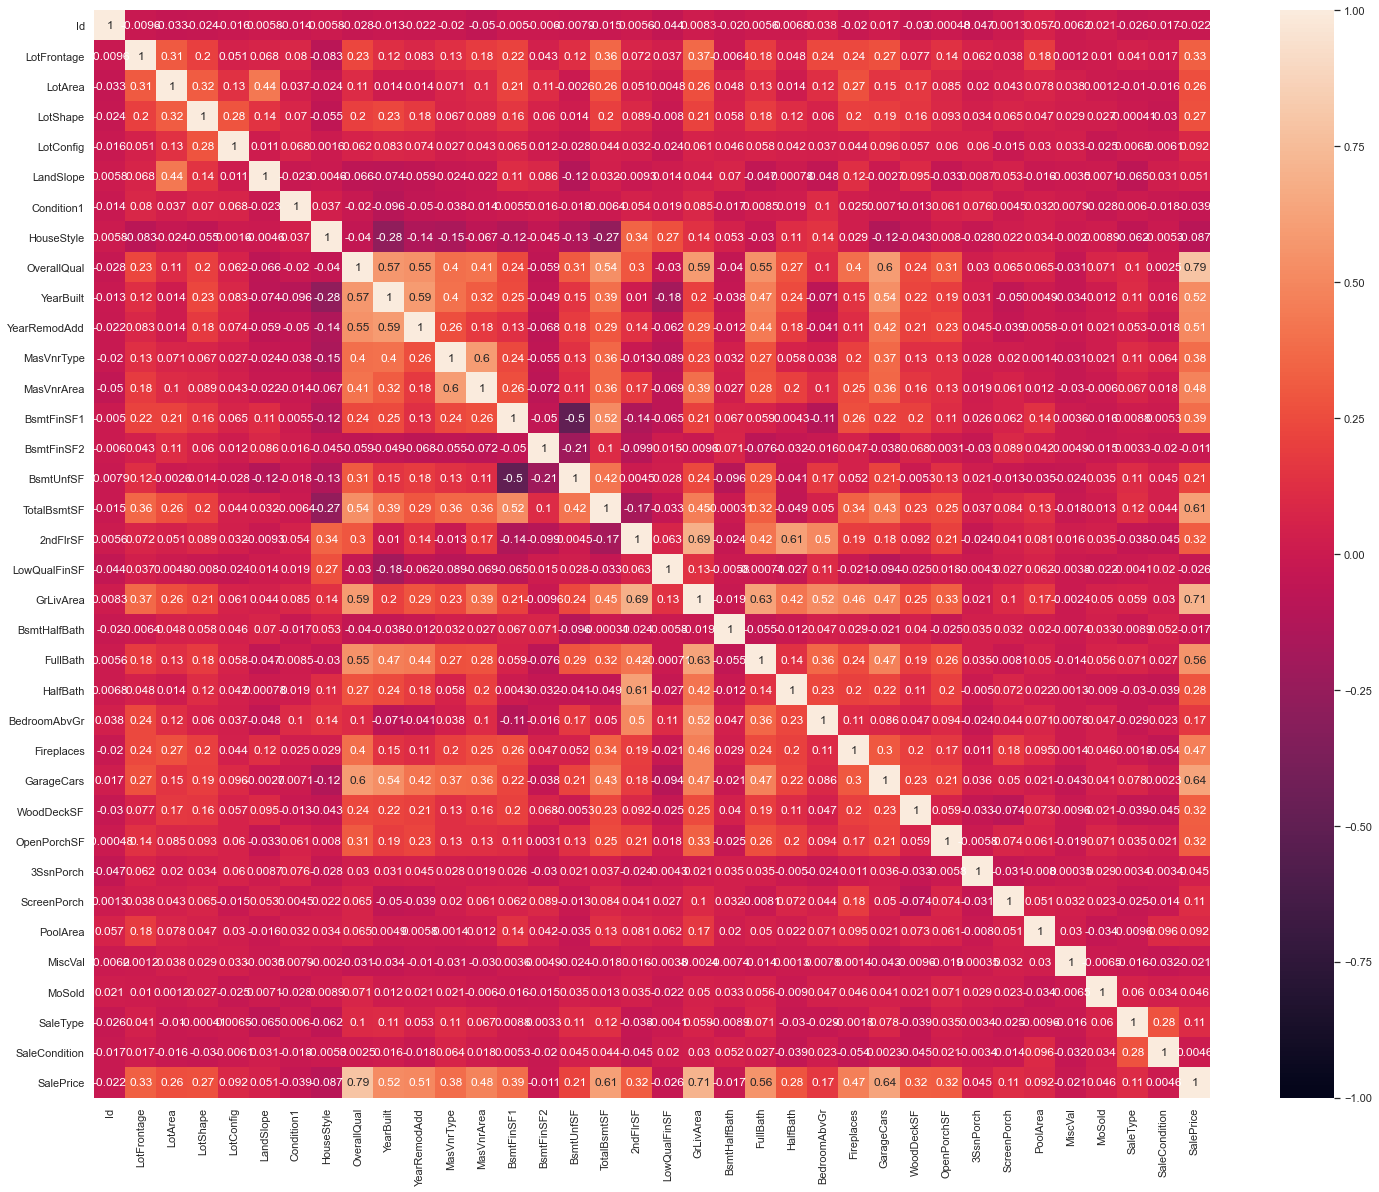

In [235]:
plt.figure(figsize = (25,20))
sns.heatmap(df1.corr(), annot = True, vmin = -1)

###  youtube
###### Problems:
#### 1. a lot of features : 81
#### 2. NaNs
#### 3. String features

In [55]:
ds = df.copy()

In [56]:
ds

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<AxesSubplot:>

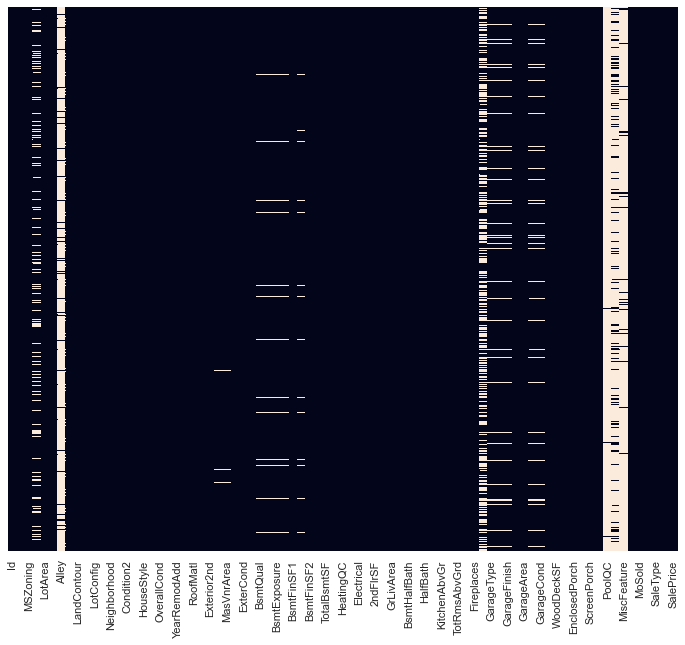

In [60]:
plt.figure(figsize = (12,10))
#                            y표시 제거        범위 제거
sns.heatmap(ds.isnull(), yticklabels=False, cbar = False)

In [61]:
for col in ds.columns:
    if ds[col].isnull().sum()!= 0:
        print(col , " : ", ds[col].isnull().sum())


LotFrontage  :  259
Alley  :  1369
MasVnrType  :  8
MasVnrArea  :  8
BsmtQual  :  37
BsmtCond  :  37
BsmtExposure  :  38
BsmtFinType1  :  37
BsmtFinType2  :  38
Electrical  :  1
FireplaceQu  :  690
GarageType  :  81
GarageYrBlt  :  81
GarageFinish  :  81
GarageQual  :  81
GarageCond  :  81
PoolQC  :  1453
Fence  :  1179
MiscFeature  :  1406


In [62]:
## Fill Missing Values

ds['LotFrontage'] = ds['LotFrontage'].fillna(ds['LotFrontage'].mean())
ds.drop('Alley', axis = 1, inplace = True)
ds['BsmtCond'] = ds['BsmtCond'].fillna(ds['BsmtCond'].mode()[0]) # the highest frequency in the set
ds['BsmtQual'] = ds['BsmtQual'].fillna(ds['BsmtQual'].mode())

In [63]:
ds['GarageType'] =  ds['GarageType'].fillna(ds['GarageType'].mode())
ds.drop('GarageYrBlt', axis = 1, inplace = True)


In [64]:
ds.drop('GarageYrFinish', axis = 1, inplace = True)


In [65]:
ds['GarageQual'] =  ds['GarageQual'].fillna(ds['GarageQual'].mode())
ds['GarageCond'] =  ds['GarageCond'].fillna(ds['GarageCond'].mode())

In [66]:
ds.drop(['PoolQC','Fence'],axis = 1, inplace = True)

In [71]:
ds.drop('MiscFeature',axis = 1, inplace = True)

In [73]:
ds.drop('FireplaceQu',axis = 1, inplace = True)

In [74]:
for col in ds.columns:
    if ds[col].isnull().sum()!= 0:
        print(col , " : ", ds[col].isnull().sum())


MasVnrType  :  8
MasVnrArea  :  8
BsmtQual  :  37
BsmtExposure  :  38
BsmtFinType1  :  37
BsmtFinType2  :  38
Electrical  :  1
GarageType  :  81
GarageQual  :  81
GarageCond  :  81


In [ ]:
for col in ds.columns:

### Me : with easier way 

In [125]:
easydf = df.copy()
easydf

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [126]:
easydf.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [127]:
# 1. all NaN display

for col in easydf.columns:
    if (easydf[col].isnull().sum()!=0):
        print(col, ":",easydf[col].isnull().sum())
    
 

LotFrontage : 259
Alley : 1369
MasVnrType : 8
MasVnrArea : 8
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinType2 : 38
Electrical : 1
FireplaceQu : 690
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageQual : 81
GarageCond : 81
PoolQC : 1453
Fence : 1179
MiscFeature : 1406


In [128]:
# delete above 50% NaNs

dropsNan = [] # ['Alley', 'PoolQC', 'Fence', 'MiscFeature']

for col in easydf.columns:
    if (easydf[col].isnull().sum()>(easydf.shape[0]/2)):
        dropsNan.append(col)
        easydf.drop(col, axis = 1, inplace = True)

In [129]:
dropsNan

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [130]:
# 1/2 drop 후 남은 NaNs
nans = []

for col in easydf.columns:
    if (easydf[col].isnull().sum()!=0):
        nans.append(col)
        print(col, ":",easydf[col].isnull().sum())
    
nans

LotFrontage : 259
MasVnrType : 8
MasVnrArea : 8
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinType2 : 38
Electrical : 1
FireplaceQu : 690
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageQual : 81
GarageCond : 81


['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [131]:
# know which NaN features are String or int

for n in nans:
    print(n, ':',easydf[n].unique()[0])

LotFrontage : 65.0
MasVnrType : BrkFace
MasVnrArea : 196.0
BsmtQual : Gd
BsmtCond : TA
BsmtExposure : No
BsmtFinType1 : GLQ
BsmtFinType2 : Unf
Electrical : SBrkr
FireplaceQu : nan
GarageType : Attchd
GarageYrBlt : 2003.0
GarageFinish : RFn
GarageQual : TA
GarageCond : TA


In [132]:
easydf['LotFrontage'].unique()[0]

65.0

In [133]:
# fillna : int--> mean(), string --> mode()[0]

easydf['LotFrontage'] = easydf['LotFrontage'].fillna(easydf['LotFrontage'].mean())
easydf['MasVnrType'] = easydf['MasVnrType'].fillna(easydf['MasVnrType'].mode()[0])
easydf['MasVnrArea'] = easydf['MasVnrArea'].fillna(easydf['MasVnrArea'].mean())
easydf['BsmtQual'] = easydf['BsmtQual'].fillna(easydf['BsmtQual'].mode()[0])
easydf['BsmtCond'] = easydf['BsmtCond'].fillna(easydf['BsmtCond'].mode()[0])
easydf['BsmtExposure'] = easydf['BsmtExposure'].fillna(easydf['BsmtExposure'].mode()[0])
easydf['BsmtFinType1'] = easydf['BsmtFinType1'].fillna(easydf['BsmtFinType1'].mode()[0])
easydf['BsmtFinType2'] = easydf['BsmtFinType2'].fillna(easydf['BsmtFinType2'].mode()[0])
easydf['Electrical'] = easydf['Electrical'].fillna(easydf['Electrical'].mode()[0])

In [134]:

easydf['GarageType'] = easydf['GarageType'].fillna(easydf['GarageType'].mode()[0])
easydf['GarageYrBlt'] = easydf['GarageYrBlt'].fillna(easydf['GarageYrBlt'].mode()[0])
easydf['GarageFinish'] = easydf['GarageFinish'].fillna(easydf['GarageFinish'].mode()[0])

easydf['GarageQual'] = easydf['GarageQual'].fillna(easydf['GarageQual'].mode()[0])
easydf['GarageCond'] = easydf['GarageCond'].fillna(easydf['GarageCond'].mode()[0])


In [135]:

easydf['FireplaceQu'] = easydf['FireplaceQu'].fillna(easydf['FireplaceQu'].mode()[0])

In [136]:
easydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [137]:
(easydf.isnull().sum()==0).count() # total 77 feature 있어 원래 == no NaN features!!

77

In [138]:
X = easydf.iloc[:,:-1]
y = easydf.iloc[:,-1]


In [139]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,112,0,0,0,0,4,2010,WD,Normal


In [140]:
# extract fts with only 3 categories for Mapping


categoricals_for_mapping = []

for col in X.columns:
    if len(X[col].unique())<=3:
        categoricals_for_mapping.append(col)
        
categoricals_for_mapping

['Street',
 'Utilities',
 'LandSlope',
 'CentralAir',
 'BsmtHalfBath',
 'HalfBath',
 'GarageFinish',
 'PavedDrive']

In [141]:
X.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [ ]:
X.drop('Id', axis = 1, inplace=True)

In [142]:
X['Street'] = X['Street'].replace({'Pave':0,'Grvl':1})
X['Utilities'] = X['Utilities'].replace({'AllPub':0,'NoSeWa':1})  
X['LandSlope'] = X['LandSlope'].replace({'Gtl':0,'NMod':1,'Sev':2})  
X['CentralAir'] = X['CentralAir'].replace({'Y':0,'N':1})  

In [143]:
X['GarageFinish'] = X['GarageFinish'].replace({'Unf':0,'RFn':1,'Fin':2})  
X['PavedDrive'] = X['PavedDrive'].replace({'Y':0,'N':1,'P':1})  

In [144]:
X['LandSlope'] = X['LandSlope'].apply(lambda x: 1 if x=='Mod' else x)

In [146]:
X['LandSlope'].value_counts()

0    1382
1      65
2      13
Name: LandSlope, dtype: int64

In [147]:
for mapped in categoricals_for_mapping:
    print(X.loc[:,mapped])

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: Street, Length: 1460, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: Utilities, Length: 1460, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: LandSlope, Length: 1460, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: CentralAir, Length: 1460, dtype: int64
0       0
1       1
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: BsmtHalfBath, Length: 1460, dtype: int64
0       1
1       0
2       1
3       0
4       1
       ..
1455    1
1456    0
1457    0
1458    0
1459    1
Name: HalfBath, Length: 1460, dtype: int64
0       1
1       1
2       1
3       0
4       1
       ..
1455    1
1456  

In [211]:
# Extract fts which have 3<x<=6 categories for onehot encode

# categoricals_for_onehot = []
# nums_of_dummy_cols = 0

# for col in X.columns:
#     if ((len(X[col].unique())>3)&(len(X[col].unique())<=6)):
#         print(col,":",len(X[col].unique()))
#         categoricals_for_onehot.append(col)
#         nums_of_dummy_cols = nums_of_dummy_cols+len(X[col].unique())

# print(categoricals_for_onehot )

# drop_dummy_features = len(categoricals_for_onehot)
# print('\nshould be added {} columns after dummied'.format(nums_of_dummy_cols-drop_dummy_features))




categoricals_for_onehot = []


for col in X.columns:
    if ((len(X[col].unique())>3)):
        print(col,":",len(X[col].unique()))
        categoricals_for_onehot.append(col)
       

print(categoricals_for_onehot )



MSSubClass : 15
MSZoning : 5
LotFrontage : 111
LotArea : 1073
LotShape : 4
LandContour : 4
LotConfig : 5
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
OverallQual : 10
OverallCond : 9
YearBuilt : 112
YearRemodAdd : 61
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 4
MasVnrArea : 328
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinSF1 : 637
BsmtFinType2 : 6
BsmtFinSF2 : 144
BsmtUnfSF : 780
TotalBsmtSF : 721
Heating : 6
HeatingQC : 5
Electrical : 5
1stFlrSF : 753
2ndFlrSF : 417
LowQualFinSF : 24
GrLivArea : 861
BsmtFullBath : 4
FullBath : 4
BedroomAbvGr : 8
KitchenAbvGr : 4
KitchenQual : 4
TotRmsAbvGrd : 12
Functional : 7
Fireplaces : 4
FireplaceQu : 5
GarageType : 6
GarageYrBlt : 97
GarageCars : 5
GarageArea : 441
GarageQual : 5
GarageCond : 5
WoodDeckSF : 274
OpenPorchSF : 202
EnclosedPorch : 120
3SsnPorch : 20
ScreenPorch : 76
PoolArea : 8
MiscVal : 21
MoSold : 12
YrS

In [206]:
for c in categoricals_for_onehot:
    print(c,':',X[c].unique()[0],", ",X[c].unique()[1],", ",X[c].unique()[2])

MSSubClass : 60 ,  20 ,  70
MSZoning : RL ,  RM ,  C (all)
LotFrontage : 65.0 ,  80.0 ,  68.0
LotArea : 8450 ,  9600 ,  11250
LotShape : Reg ,  IR1 ,  IR2
LandContour : Lvl ,  Bnk ,  Low
LotConfig : Inside ,  FR2 ,  Corner
Neighborhood : CollgCr ,  Veenker ,  Crawfor
Condition1 : Norm ,  Feedr ,  PosN
Condition2 : Norm ,  Artery ,  RRNn
BldgType : 1Fam ,  2fmCon ,  Duplex
HouseStyle : 2Story ,  1Story ,  1.5Fin
OverallQual : 7 ,  6 ,  8
OverallCond : 5 ,  8 ,  6
YearBuilt : 2003 ,  1976 ,  2001
YearRemodAdd : 2003 ,  1976 ,  2002
RoofStyle : Gable ,  Hip ,  Gambrel
RoofMatl : CompShg ,  WdShngl ,  Metal
Exterior1st : VinylSd ,  MetalSd ,  Wd Sdng
Exterior2nd : VinylSd ,  MetalSd ,  Wd Shng
MasVnrType : BrkFace ,  None ,  Stone
MasVnrArea : 196.0 ,  0.0 ,  162.0
ExterQual : Gd ,  TA ,  Ex
ExterCond : TA ,  Gd ,  Fa
Foundation : PConc ,  CBlock ,  BrkTil
BsmtQual : Gd ,  TA ,  Ex
BsmtCond : TA ,  Gd ,  Fa
BsmtExposure : No ,  Gd ,  Mn
BsmtFinType1 : GLQ ,  ALQ ,  Unf
BsmtFinSF1 : 706 ,  

In [207]:
# extract only 3>x catecorical OBJECT FEATURES for oneHot encode --> if feature is numeric or continuous--> data gets sooo huge

categorical_final_for_onehot = ['MSZoning','LotShape','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
                               'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
                               'ExterCond','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                                'BsmtFinType2','Heating','HeatingQC','Electrical','KitchenQual','Functional','FireplaceQu','GarageType',
                               'GarageQual','GarageCond','SaleType','SaleCondition' ]

In [213]:
# OneHot encode   categoricals_for_onehot  = 3<x| 

categoricals_for_onehot

def onehot_encode(df, cols_for_dummy):
    df = df.copy()
    
    for cd in cols_for_dummy:
        dums = pd.get_dummies(df[cd], prefix=cd)
        df = pd.concat([df, dums], axis = 1)
    
    
    df.drop(cols_for_dummy, axis = 1, inplace = True)
    return df



In [214]:
X_dummed = onehot_encode(X,categorical_final_for_onehot )

In [215]:
X_dummed

,MSSubClass,LotFrontage,LotArea,Street,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,0,0,0,7,5,2003,2003,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,0,0,0,6,8,1976,1976,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,0,0,0,7,5,2001,2002,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,0,0,0,7,5,1915,1970,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,0,0,0,8,5,2000,2000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,0,0,0,6,5,1999,2000,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,0,0,0,6,6,1978,1988,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,0,0,0,7,9,1941,2006,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,0,0,0,5,6,1950,1996,...,0,0,0,1,0,0,0,0,1,0


In [216]:
X_dummed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 271 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(39), uint8(229)
memory usage: 805.7 KB


In [217]:
X_dummed.isin(['Mod']).any()

MSSubClass               False
LotFrontage              False
LotArea                  False
Street                   False
Utilities                False
                         ...  
SaleCondition_AdjLand    False
SaleCondition_Alloca     False
SaleCondition_Family     False
SaleCondition_Normal     False
SaleCondition_Partial    False
Length: 271, dtype: bool

###### X_dummied : dropped many Nan included fts, Filled out Nans, Mapped 2~3 categorical object Fts, other categoricals got dummied
## all data is NUMERICAL

In [269]:
X_dummed

,MSSubClass,LotFrontage,LotArea,Street,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,0,0,0,7,5,2003,2003,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,0,0,0,6,8,1976,1976,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,0,0,0,7,5,2001,2002,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,0,0,0,7,5,1915,1970,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,0,0,0,8,5,2000,2000,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,0,0,0,6,5,1999,2000,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,0,0,0,6,6,1978,1988,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,0,0,0,7,9,1941,2006,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,0,0,0,5,6,1950,1996,...,0,0,0,1,0,0,0,0,1,0


## !! Was thinking about Univariate Feature selection but first let's see accuracy without feature selection

In [292]:
from sklearn.preprocessing import RobustScaler

In [293]:
def scaling(df):
    df = df.copy()
    
    df = pd.DataFrame(RobustScaler().fit_transform(df),columns = df.columns)
    
    
    return df

In [294]:

scaled_X = scaling(X_dummed)
scaled_X

,MSSubClass,LotFrontage,LotArea,Street,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.2,-0.265787,-0.254076,0.0,0.0,0.0,0.5,0.0,0.652174,0.243243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.6,0.523686,0.030015,0.0,0.0,0.0,0.0,3.0,0.065217,-0.486486,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,-0.107893,0.437624,0.0,0.0,0.0,0.5,0.0,0.608696,0.216216,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.4,-0.528945,0.017663,0.0,0.0,0.0,0.5,0.0,-1.260870,-0.648649,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.0
4,0.2,0.734213,1.181201,0.0,0.0,0.0,1.0,0.0,0.586957,0.162162,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.2,-0.423682,-0.385746,0.0,0.0,0.0,0.0,0.0,0.565217,0.162162,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,-0.6,0.786844,0.913167,0.0,0.0,0.0,0.0,1.0,0.108696,-0.162162,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,0.4,-0.213156,-0.107831,0.0,0.0,0.0,0.5,4.0,-0.695652,0.324324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,-0.6,-0.107893,0.058918,0.0,0.0,0.0,-0.5,1.0,-0.500000,0.054054,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### !! test.csv ни алып келип ошонукун референс кылып predict 해야 되는데(Utube) 일단 여기서만 accuracy 보자

In [303]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(scaled_X, y, train_size = 0.7)
X_train


,MSSubClass,LotFrontage,LotArea,Street,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1055,-0.6,1.786844,0.465044,0.0,0.0,0.0,0.0,0.0,0.065217,-0.486486,...,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,-1.0,0.0
815,-0.6,-1.160524,0.656744,0.0,0.0,0.0,0.5,0.0,0.543478,0.108108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
325,-0.1,-1.055261,-1.106349,0.0,0.0,0.0,-0.5,1.0,-0.695652,-1.189189,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159,0.2,3.365792,2.445529,0.0,0.0,0.0,0.5,0.0,0.695652,0.324324,...,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,1.0
532,-0.6,-0.528945,-0.562871,0.0,0.0,0.0,-0.5,2.0,-0.391304,0.351351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,2.2,-2.107893,-1.555459,0.0,0.0,0.0,0.5,0.0,0.673913,0.297297,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188,0.8,-0.318419,-0.607831,0.0,0.0,0.0,-0.5,0.0,0.130435,-0.405405,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0
47,-0.6,0.734213,0.399580,0.0,0.0,0.0,1.0,0.0,0.717391,0.324324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134,-0.6,0.418423,0.211586,0.0,0.0,0.0,-0.5,1.0,-0.108696,-0.027027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [304]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier



In [305]:
ll_model = LogisticRegression()
ll_model.fit(X_train, y_train)
score = ll_model.score(X_test, y_test)
print('ll accur:{:.2f}%'.format(score*100))

ll accur:1.37%


C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [306]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
score = svm_model.score(X_test, y_test)
print('svm accur:{:.2f}%'.format(score*100))

svm accur:1.37%



###  ACCURACY IS ~1.3%

# Univariate Feature selection   From X_dummies --> univ_selected_df

In [220]:
from sklearn.feature_selection import SelectKBest, chi2


select_fts = SelectKBest(score_func=chi2, k = 200)
ft_fit = select_fts.fit(X_dummed, y)
df_best_scores = pd.DataFrame(ft_fit.scores_, columns = ['Score'])

In [221]:
df_best_scores.head(4)

,Score
0,1.928123e+04
1,5.066301e+03
2,1.011497e+07
3,8.846624e+02


In [222]:
X_dummed_cols = pd.DataFrame(X_dummed.columns,columns = ['Features'])


In [223]:
df_fts_with_scores = pd.concat([X_dummed_cols,df_best_scores], axis = 1)

In [224]:
df_fts_with_scores

,Features,Score
0,MSSubClass,1.928123e+04
1,LotFrontage,5.066301e+03
2,LotArea,1.011497e+07
3,Street,8.846624e+02
4,Utilities,2.423333e+02
...,...,...
266,SaleCondition_AdjLand,4.218333e+02
267,SaleCondition_Alloca,1.366889e+03
268,SaleCondition_Family,3.869443e+02
269,SaleCondition_Normal,1.524866e+02


In [227]:
df_best_200 = df_fts_with_scores.nlargest(200,'Score' )

In [232]:
df_best_200.head(4)

,Features,Score
2,LotArea,1.011497e+07
39,MiscVal,6.253332e+06
17,2ndFlrSF,4.648841e+05
11,BsmtFinSF1,3.999851e+05


In [238]:
names_best_200 = list(df_best_200.iloc[:,0])
names_best_200

['LotArea',
 'MiscVal',
 '2ndFlrSF',
 'BsmtFinSF1',
 'PoolArea',
 'BsmtFinSF2',
 'MasVnrArea',
 'BsmtUnfSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotalBsmtSF',
 '3SsnPorch',
 'ScreenPorch',
 'WoodDeckSF',
 '1stFlrSF',
 'EnclosedPorch',
 'GarageArea',
 'OpenPorchSF',
 'MSSubClass',
 'LotFrontage',
 'Exterior2nd_Other',
 'Exterior1st_ImStucc',
 'Condition2_RRAn',
 'ExterCond_Po',
 'ExterCond_Po',
 'Heating_Floor',
 'SaleType_Con',
 'SaleCondition_Alloca',
 'ExterQual_Ex',
 'FireplaceQu_Ex',
 'Condition2_PosN',
 'BsmtCond_Po',
 'SaleType_New',
 'Neighborhood_NridgHt',
 'SaleCondition_Partial',
 'Neighborhood_NoRidge',
 'MSZoning_C (all)',
 'KitchenQual_Ex',
 'BsmtQual_Ex',
 'Neighborhood_Veenker',
 'LotShape_IR3',
 'Heating_Wall',
 'Foundation_Stone',
 'Foundation_Slab',
 'Exterior2nd_CmentBd',
 'Heating_Grav',
 'Exterior1st_CemntBd',
 'Neighborhood_Blmngtn',
 'LandSlope',
 'Street',
 'HouseStyle_2.5Fin',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'MSZoning_FV',
 'RoofMatl_WdShngl',
 

In [235]:
X_dummed.head(4)

,MSSubClass,LotFrontage,LotArea,Street,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,0,0,0,7,5,2003,2003,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,0,0,0,6,8,1976,1976,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,0,0,0,7,5,2001,2002,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,0,0,0,7,5,1915,1970,...,0,0,0,1,1,0,0,0,0,0


In [240]:
'LotArea'==names_best_200[0]

True

In [259]:
my_virtual_df = pd.DataFrame({
    'drop ok' : np.random.randint(10,size = (1460)) # X_dummed's row is 1460
})

In [260]:
my_virtual_df

,drop ok
0,4
1,9
2,5
3,5
4,2
...,...
1455,0
1456,2
1457,7
1458,0


In [257]:
X_dummed.shape

(1460, 271)

In [267]:
X_dummed.loc[:,['ExterCond_Fa']]

,ExterCond_Fa,ExterCond_Fa
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1455,0,0
1456,0,0
1457,0,0
1458,0,0


In [268]:
# FIND names_best_200 COLUMNS IN X_DUMMED DF --> make new DF with only best FEATURES!

for col in X_dummed.columns:
    for i in range(len(names_best_200)):
        if col == names_best_200[i] :
#             my_virtual_df[col] = list(X_dummed.loc[:,col])
            print(col,':',len(list(X_dummed.loc[:,col])))

MSSubClass : 1460
LotFrontage : 1460
LotArea : 1460
Street : 1460
LandSlope : 1460
MasVnrArea : 1460
BsmtFinSF1 : 1460
BsmtFinSF2 : 1460
BsmtUnfSF : 1460
TotalBsmtSF : 1460
CentralAir : 1460
1stFlrSF : 1460
2ndFlrSF : 1460
LowQualFinSF : 1460
GrLivArea : 1460
BsmtHalfBath : 1460
HalfBath : 1460
Fireplaces : 1460
GarageFinish : 1460
GarageArea : 1460
PavedDrive : 1460
WoodDeckSF : 1460
OpenPorchSF : 1460
EnclosedPorch : 1460
3SsnPorch : 1460
ScreenPorch : 1460
PoolArea : 1460
MiscVal : 1460
MoSold : 1460
MSZoning_C (all) : 1460
MSZoning_FV : 1460
MSZoning_RH : 1460
MSZoning_RM : 1460
LotShape_IR1 : 1460
LotShape_IR2 : 1460
LotShape_IR3 : 1460
LandContour_Bnk : 1460
LandContour_HLS : 1460
LandContour_Low : 1460
LotConfig_Corner : 1460
LotConfig_CulDSac : 1460
LotConfig_FR2 : 1460
LotConfig_FR3 : 1460
Neighborhood_Blmngtn : 1460
Neighborhood_BrDale : 1460
Neighborhood_BrkSide : 1460
Neighborhood_ClearCr : 1460
Neighborhood_CollgCr : 1460
Neighborhood_Crawfor : 1460
Neighborhood_Edwards : 

In [256]:
dd

0                                                                        0
1                                                                        0
2                                                                        0
3                                                                        0
4                                                                        0
                                               ...                        
SaleType_New             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...
SaleType_Oth             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
SaleCondition_Abnorml    [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...
SaleCondition_Alloca     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
SaleCondition_Partial    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, ...
Name: SaleCondition_Partial, Length: 1657, dtype: object

In [186]:
X_dummed

,Street,Utilities,LandSlope,CentralAir,BsmtHalfBath,HalfBath,GarageFinish,PavedDrive,MSSubClass_20,MSSubClass_30,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


# 2nd trial  after 3 monthes

In [6]:
train_data = df.copy()
train_data.sample(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1415,1416,120,RL,51.0,3635,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,175900
879,880,20,RL,NaN,7000,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2009,WD,Normal,136500
1163,1164,90,RL,60.0,12900,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Alloca,108959
759,760,60,RL,65.0,12257,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,290000


In [7]:
test_data = pd.read_csv('test.csv')
test_data.sample(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
769,2230,80,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
652,2113,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
1084,2545,50,RL,74.0,16287,Pave,NaN,Reg,Lvl,AllPub,...,100,0,NaN,NaN,NaN,0,7,2007,WD,Normal
192,1653,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal


In [8]:
datas = {'train_data':train_data, 
         ' test_data':test_data}

In [41]:
test_id = test_data.Id
test_id[:3]

0    1461
1    1462
2    1463
Name: Id, dtype: int64

## data analysis

In [32]:
[print(f'{name} shape: {data.shape} \n') for name, data in datas.items()]

train_data shape: (1460, 81) 

test_data shape: (1459, 80) 



[None, None]

In [33]:
for data_name, data in datas.items():
     for col in data.columns:
        if data[col].isnull().sum()!=0:
            print(f'{data_name} - {col}: {data[col].isnull().sum()}')

train_data - LotFrontage: 259
train_data - Alley: 1369
train_data - MasVnrType: 8
train_data - MasVnrArea: 8
train_data - BsmtQual: 37
train_data - BsmtCond: 37
train_data - BsmtExposure: 38
train_data - BsmtFinType1: 37
train_data - BsmtFinType2: 38
train_data - Electrical: 1
train_data - FireplaceQu: 690
train_data - GarageType: 81
train_data - GarageYrBlt: 81
train_data - GarageFinish: 81
train_data - GarageQual: 81
train_data - GarageCond: 81
train_data - PoolQC: 1453
train_data - Fence: 1179
train_data - MiscFeature: 1406
test_data - MSZoning: 4
test_data - LotFrontage: 227
test_data - Alley: 1352
test_data - Utilities: 2
test_data - Exterior1st: 1
test_data - Exterior2nd: 1
test_data - MasVnrType: 16
test_data - MasVnrArea: 15
test_data - BsmtQual: 44
test_data - BsmtCond: 45
test_data - BsmtExposure: 44
test_data - BsmtFinType1: 42
test_data - BsmtFinSF1: 1
test_data - BsmtFinType2: 42
test_data - BsmtFinSF2: 1
test_data - BsmtUnfSF: 1
test_data - TotalBsmtSF: 1
test_data - Bsmt

#### serious amount of NaNs
* train_data - Alley: 1369,  test_data - Alley: 1352    
* train_data - FireplaceQu: 690, test_data - FireplaceQu: 730 
* train_data - PoolQC: 1453, test_data - PoolQC: 1456
* train_data - Fence: 1179, test_data - Fence: 1169
* train_data - MiscFeature: 1406, test_data - MiscFeature: 1408

In [42]:
def preprocess_1(tr_df, ts_df):
    tr_df = tr_df.copy()
    ts_df = ts_df.copy()
    
    # drop
    
    cols = ['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
    
    tr_df = tr_df.drop(cols, axis = 1)
    ts_df = ts_df.drop(cols, axis = 1)
    
    
    return tr_df, ts_df

In [45]:
# prepr1 = after preprocessing 1

train_data_prepr1, test_data_prepr1 = preprocess_1(train_data, test_data)

In [46]:
train_data_prepr1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [54]:
datas_prepros1 = {'train_data_prepr1':train_data_prepr1, 
                  ' test_data_prepr1':test_data_prepr1}

for name_data, data in datas_prepros1.items():
    print('\n',name_data.upper(), ': \n')
    for col in data.columns:
        if data[col].isnull().sum()!=0:
            print(f'{col} - {data[col].isnull().sum()}')


 TRAIN_DATA_PREPR1 : 

LotFrontage - 259
MasVnrType - 8
MasVnrArea - 8
BsmtQual - 37
BsmtCond - 37
BsmtExposure - 38
BsmtFinType1 - 37
BsmtFinType2 - 38
Electrical - 1
GarageType - 81
GarageYrBlt - 81
GarageFinish - 81
GarageQual - 81
GarageCond - 81

  TEST_DATA_PREPR1 : 

MSZoning - 4
LotFrontage - 227
Utilities - 2
Exterior1st - 1
Exterior2nd - 1
MasVnrType - 16
MasVnrArea - 15
BsmtQual - 44
BsmtCond - 45
BsmtExposure - 44
BsmtFinType1 - 42
BsmtFinSF1 - 1
BsmtFinType2 - 42
BsmtFinSF2 - 1
BsmtUnfSF - 1
TotalBsmtSF - 1
BsmtFullBath - 2
BsmtHalfBath - 2
KitchenQual - 1
Functional - 2
GarageType - 76
GarageYrBlt - 78
GarageFinish - 78
GarageCars - 1
GarageArea - 1
GarageQual - 78
GarageCond - 78
SaleType - 1


In [67]:
just_cols_needed = train_data_prepr1.copy()

print("each columns' number of unique value \n")
for col in just_cols_needed.columns[:-1]:
    print(f'train_data - {col}: {len(train_data_prepr1[col].unique())}')
    print(f' test_data - {col}: {len(test_data_prepr1[col].unique())} \n')    

each columns' number of unique value
train_data - MSSubClass: 15
 test_data - MSSubClass: 16 

train_data - MSZoning: 5
 test_data - MSZoning: 6 

train_data - LotFrontage: 111
 test_data - LotFrontage: 116 

train_data - LotArea: 1073
 test_data - LotArea: 1106 

train_data - Street: 2
 test_data - Street: 2 

train_data - LotShape: 4
 test_data - LotShape: 4 

train_data - LandContour: 4
 test_data - LandContour: 4 

train_data - Utilities: 2
 test_data - Utilities: 2 

train_data - LotConfig: 5
 test_data - LotConfig: 5 

train_data - LandSlope: 3
 test_data - LandSlope: 3 

train_data - Neighborhood: 25
 test_data - Neighborhood: 25 

train_data - Condition1: 9
 test_data - Condition1: 9 

train_data - Condition2: 8
 test_data - Condition2: 5 

train_data - BldgType: 5
 test_data - BldgType: 5 

train_data - HouseStyle: 8
 test_data - HouseStyle: 7 

train_data - OverallQual: 10
 test_data - OverallQual: 10 

train_data - OverallCond: 9
 test_data - OverallCond: 9 

train_data - Ye

## Fillna

In [70]:
train_data_prepr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [137]:
print('====== [INFO] get only object columns =======' )

objects_train = train_data_prepr1.select_dtypes('object').columns[:-1]
objects_test = test_data_prepr1.select_dtypes('object').columns
print('objects_train : ',len( objects_train),'\n',objects_train)
print(' objects_test : ', len( objects_train),'\n',objects_test)


print('\n ====== [INFO] get only number columns =======' )

number_train = train_data_prepr1.select_dtypes('number').columns[:-1]
number_test = test_data_prepr1.select_dtypes('number').columns
print('number_train : ', len( number_train),'\n',number_train)
print(' number_test : ', len(number_test),'\n',number_test)

====== [INFO] get only object columns =======
objects_train :  37 
 Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType'],
      dtype='object')
 objects_test :  37 
 Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', '

> both object columns are similar

In [155]:
print(' ====== [INFO]  get only OBJECT columns which has NaN values ========== \n')
object_nan_cols = []

for col in objects_train:
    if train_data_prepr1[col].isnull().sum()!=0 or test_data_prepr1[col].isnull().sum()!=0:
            object_nan_cols.append(col)
            print(f'train_data - {col}:{train_data_prepr1[col].isnull().sum()}')
            print(f' test_data - {col}:{test_data_prepr1[col].isnull().sum()} \n')

 ====== [INFO]  get only OBJECT columns which has NaN values ========== 

train_data - MSZoning:0
 test_data - MSZoning:4 

train_data - Utilities:0
 test_data - Utilities:2 

train_data - Exterior1st:0
 test_data - Exterior1st:1 

train_data - Exterior2nd:0
 test_data - Exterior2nd:1 

train_data - MasVnrType:8
 test_data - MasVnrType:16 

train_data - BsmtQual:37
 test_data - BsmtQual:44 

train_data - BsmtCond:37
 test_data - BsmtCond:45 

train_data - BsmtExposure:38
 test_data - BsmtExposure:44 

train_data - BsmtFinType1:37
 test_data - BsmtFinType1:42 

train_data - BsmtFinType2:38
 test_data - BsmtFinType2:42 

train_data - Electrical:1
 test_data - Electrical:0 

train_data - KitchenQual:0
 test_data - KitchenQual:1 

train_data - Functional:0
 test_data - Functional:2 

train_data - GarageType:81
 test_data - GarageType:76 

train_data - GarageFinish:81
 test_data - GarageFinish:78 

train_data - GarageQual:81
 test_data - GarageQual:78 

train_data - GarageCond:81
 test_data

In [159]:
print('===== [ INFO] get only NUMBER columns which contains NaN Values ======== \n')

number_nan_cols = []
for col in number_train:
    if train_data_prepr1[col].isnull().sum()!=0 or test_data_prepr1[col].isnull().sum()!= 0:
        number_nan_cols.append(col)
        print(f'train_data - {col}:{train_data_prepr1[col].isnull().sum()}')
        print(f' test_data - {col}:{test_data_prepr1[col].isnull().sum()} \n')
        
number_nan_cols

===== [ INFO] get only NUMBER columns which contains NaN Values ======== 

train_data - LotFrontage:259
 test_data - LotFrontage:227 

train_data - MasVnrArea:8
 test_data - MasVnrArea:15 

train_data - BsmtFinSF1:0
 test_data - BsmtFinSF1:1 

train_data - BsmtFinSF2:0
 test_data - BsmtFinSF2:1 

train_data - BsmtUnfSF:0
 test_data - BsmtUnfSF:1 

train_data - TotalBsmtSF:0
 test_data - TotalBsmtSF:1 

train_data - BsmtFullBath:0
 test_data - BsmtFullBath:2 

train_data - BsmtHalfBath:0
 test_data - BsmtHalfBath:2 

train_data - GarageYrBlt:81
 test_data - GarageYrBlt:78 

train_data - GarageCars:0
 test_data - GarageCars:1 

train_data - GarageArea:0
 test_data - GarageArea:1 



['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [160]:
def preprocess_2(tr_df, ts_df, object_nan_cols, number_nan_cols):
    tr_df, ts_df = tr_df.copy(), ts_df.copy()
    
    for col in object_nan_cols:
        tr_df[col] = tr_df[col].fillna(tr_df[col].mode()[0])
        ts_df[col] = ts_df[col].fillna(ts_df[col].mode()[0])
    print('====  [INFO] Nans in OBJECT columns are dealed! ===')
    
    for col in number_nan_cols:
        tr_df[col] = tr_df[col].fillna(tr_df[col].median())
        ts_df[col] = ts_df[col].fillna(ts_df[col].median())
    print('====  [INFO] Nans in NUMBER columns are dealed! ===')
                                  
    
    
    return tr_df, ts_df   

In [161]:
train_data_prepr2, test_data_prepr2 = preprocess_2(train_data_prepr1, test_data_prepr1, object_nan_cols, number_nan_cols)

====  [INFO] Nans in OBJECT columns are dealed! ===
====  [INFO] Nans in NUMBER columns are dealed! ===


In [162]:
print(train_data_prepr2.isnull().sum().sum())
print(test_data_prepr2.isnull().sum().sum())

0
0


In [165]:
print(f'train_data: \n shape- {train_data_prepr2.shape}, Nans- {train_data_prepr2.isnull().sum().sum()}')
print(f'test_data: \n shape- {test_data_prepr2.shape} , Nans- {test_data_prepr2.isnull().sum().sum()}')

train_data: 
 shape- (1460, 75), Nans- 0
test_data: 
 shape- (1459, 74) , Nans- 0


## Converting Objects into Numeric

In [177]:
print(' ===== [INFO]  object를 numeric에 변환하기 위해 category가 많지 않은지 채크하기 위해 =====' )

train_unique_values_in_object_col = {}
for col in train_data_prepr2.select_dtypes('object').columns:
    train_unique_values_in_object_col[col]=len(train_data_prepr2[col].unique())

test_unique_values_in_object_col = {}
for col in test_data_prepr2.select_dtypes('object').columns:
    test_unique_values_in_object_col[col] = len(test_data_prepr2[col].unique())


print(train_unique_values_in_object_col, '\n')
print(test_unique_values_in_object_col)

 ===== [INFO]  object를 numeric에 변환하기 위해 category가 많지 않은지 채크하기 위해 =====
{'MSZoning': 5, 'Street': 2, 'LotShape': 4, 'LandContour': 4, 'Utilities': 2, 'LotConfig': 5, 'LandSlope': 3, 'Neighborhood': 25, 'Condition1': 9, 'Condition2': 8, 'BldgType': 5, 'HouseStyle': 8, 'RoofStyle': 6, 'RoofMatl': 8, 'Exterior1st': 15, 'Exterior2nd': 16, 'MasVnrType': 4, 'ExterQual': 4, 'ExterCond': 5, 'Foundation': 6, 'BsmtQual': 4, 'BsmtCond': 4, 'BsmtExposure': 4, 'BsmtFinType1': 6, 'BsmtFinType2': 6, 'Heating': 6, 'HeatingQC': 5, 'CentralAir': 2, 'Electrical': 5, 'KitchenQual': 4, 'Functional': 7, 'GarageType': 6, 'GarageFinish': 3, 'GarageQual': 5, 'GarageCond': 5, 'PavedDrive': 3, 'SaleType': 9, 'SaleCondition': 6} 

{'MSZoning': 5, 'Street': 2, 'LotShape': 4, 'LandContour': 4, 'Utilities': 1, 'LotConfig': 5, 'LandSlope': 3, 'Neighborhood': 25, 'Condition1': 9, 'Condition2': 5, 'BldgType': 5, 'HouseStyle': 7, 'RoofStyle': 6, 'RoofMatl': 4, 'Exterior1st': 13, 'Exterior2nd': 15, 'MasVnrType': 4, 'Exter

In [182]:
# def preprocess_3(tr_df, ts_df):
#     tr_df, ts_df = tr_df.copy(), ts_df.copy()
    
    
    
#     return tr_df, ts_df 

In [178]:
train_data_prepr2['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [ ]:
test_data_prepr2['MSZoning'].unique()

In [181]:
le_train = LabelEncoder()
le_test = LabelEncoder()

In [184]:
train_data_prepr2[train_data_prepr2.select_dtypes('object').columns] = train_data_prepr2[train_data_prepr2.select_dtypes('object').columns].apply(le_train.fit_transform) 

In [187]:
test_data_prepr2[test_data_prepr2.select_dtypes('object').columns] = test_data_prepr2[test_data_prepr2.select_dtypes('object').columns].apply(le_test.fit_transform)

In [197]:
train_data_prepr2.tail(6)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,20,1,62.0,7500,1,3,3,0,4,0,...,0,0,0,0,0,10,2009,8,4,185000
1455,60,3,62.0,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,3,3,0,4,0,...,112,0,0,0,0,4,2010,8,4,142125
1459,20,3,75.0,9937,1,3,3,0,4,0,...,0,0,0,0,0,6,2008,8,4,147500


In [196]:
test_data_prepr2.tail(6)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1453,160,4,21.0,1526,1,3,3,0,4,0,...,34,0,0,0,0,0,6,2006,8,4
1454,160,4,21.0,1936,1,3,3,0,4,0,...,0,0,0,0,0,0,6,2006,8,4
1455,160,4,21.0,1894,1,3,3,0,4,0,...,24,0,0,0,0,0,4,2006,8,0
1456,20,3,160.0,20000,1,3,3,0,4,0,...,0,0,0,0,0,0,9,2006,8,0
1457,85,3,62.0,10441,1,3,3,0,4,0,...,32,0,0,0,0,700,7,2006,8,4
1458,60,3,74.0,9627,1,3,3,0,4,1,...,48,0,0,0,0,0,11,2006,8,4


In [194]:
train_data_prepr1.tail(6)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,20,FV,62.0,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2009,WD,Normal,185000
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125
1459,20,RL,75.0,9937,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,Normal,147500


In [195]:
test_data_prepr1.tail(6)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1453,160,RM,21.0,1526,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,6,2006,WD,Normal
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal
1458,60,RL,74.0,9627,Pave,Reg,Lvl,AllPub,Inside,Mod,...,48,0,0,0,0,0,11,2006,WD,Normal


## ! NANs 돼쓰! 
> convert into numeric 두 데이터 다 --> (label encoder??)    OK             
> feature selection ( correlation..)      
> scale             
> train

<AxesSubplot:>

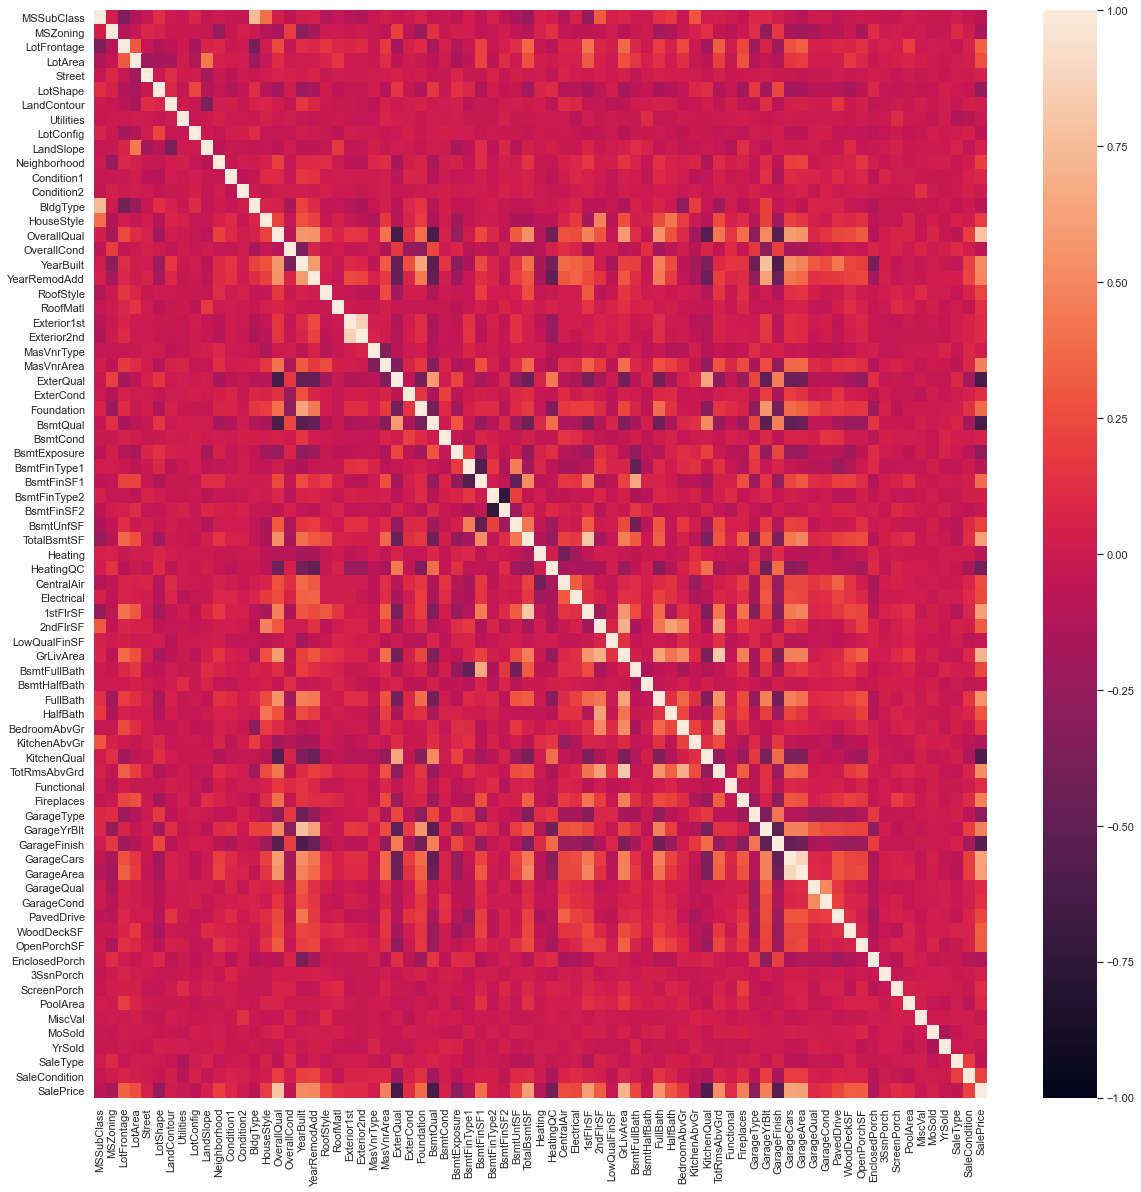

In [204]:
plt.figure(figsize = (20,20))
sns.heatmap(train_data_prepr2.corr(), vmin = -1)

####  train data - Highly correlated 
* MSSubClass -- & BldgType          
* YearBuild & GarageYearBuild --      
* TotRmsAbvGrd & GrLivArea       
* GarageCar -- & GarageArea       
* TotalBsmtUnfSF & 1sfFlSt --


In [341]:
def preprocess_final(tr_ds, ts_ds, drop_highCorr = False, scaler = False):
    tr_ds, ts_ds = tr_ds.copy(), ts_ds.copy()
    
    if drop_highCorr:
        tr_ds = tr_ds.drop(drop_highCorr, axis = 1)
        ts_ds = ts_ds.drop(drop_highCorr, axis = 1)
    
    X_train = tr_ds.drop('SalePrice', axis = 1)
    y_train = tr_ds.SalePrice
    
    if scaler:
        X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
        ts_ds = pd.DataFrame(scaler.fit_transform(ts_ds), columns = ts_ds.columns)
    
    
    
    return X_train, y_train, ts_ds

In [342]:
drop_highCorr = ['MSSubClass', 'GarageYrBlt', 'TotRmsAbvGrd', 'GarageCars','1stFlrSF']

X_train_final, y_train_final, test_final = preprocess_final(train_data_prepr2, test_data_prepr2, scaler= StandardScaler() )

In [343]:
X_train_final.shape, y_train_final.shape, test_final.shape

((1460, 74), (1460,), (1459, 74))

In [337]:
X_train_final.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,0.75,0.150685,0.033420,1.0,1.0,1.0,0.0,1.0,0.0,...,0.111517,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,0.8
1,0.000000,0.75,0.202055,0.038795,1.0,1.0,1.0,0.0,0.5,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.363636,0.25,1.0,0.8


In [344]:
# here is only train_data --> splitted X_train... for knowing accuracy
# if accuracy will be high --> we can apply that model for our test_data (test_final)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_final, y_train_final, train_size = 0.82, random_state = 5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1197, 74), (263, 74), (1197,), (263,))

## 1. TRAINING ML

In [229]:
!pip3 install xgboost
!pip3 install lightgbm


In [326]:

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor



import warnings
warnings.filterwarnings(action = 'ignore')


from sklearn.metrics import r2_score


models = {
    '                    Linear Regression': LinearRegression(),
    '                  KNeigborsRegression': KNeighborsRegressor(n_neighbors=10),
    'Linear Regression (L2 Regularization)': Ridge(),
    'Linear Regression (L! Regularization)': Lasso(),
    '                       Neural Network': MLPRegressor(),
    'Support Vector Machine(Linear Kernel)': LinearSVR(),
    '   Support Vector Machine(RBF Kernel)': SVR(),
    '                        Decision Tree': DecisionTreeRegressor(),
    '                        Random Forest': RandomForestRegressor(),
    '                    Gradient Boosting': GradientBoostingRegressor(),
    '                              XGBoost': XGBRegressor(),
    
}
print('algorithms are imported!')

algorithms are imported!


In [345]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} is trained!')

                    Linear Regression is trained!
                  KNeigborsRegression is trained!
Linear Regression (L2 Regularization) is trained!
Linear Regression (L! Regularization) is trained!
                       Neural Network is trained!
Support Vector Machine(Linear Kernel) is trained!
   Support Vector Machine(RBF Kernel) is trained!
                        Decision Tree is trained!
                        Random Forest is trained!
                    Gradient Boosting is trained!
                              XGBoost is trained!


In [346]:
y_pred_dict = {}
r2_score_dict = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_pred_dict[name] = y_pred
    
    score = r2_score(y_test, y_pred)*100
    r2_score_dict[name] = score
    
    print('{} acc: {:.2f} %'.format(name, score))
    

                    Linear Regression acc: 83.83 %
                  KNeigborsRegression acc: 75.08 %
Linear Regression (L2 Regularization) acc: 83.83 %
Linear Regression (L! Regularization) acc: 83.82 %
                       Neural Network acc: -504.99 %
Support Vector Machine(Linear Kernel) acc: -518.59 %
   Support Vector Machine(RBF Kernel) acc: -8.36 %
                        Decision Tree acc: 81.53 %
                        Random Forest acc: 88.13 %
                    Gradient Boosting acc: 89.16 %
                              XGBoost acc: 87.25 %


## Trials ML -- >
> dropped high correlated columns, without scaling


 Linear Regression acc: 79.18 %                         
                  KNeigborsRegression acc: 67.75 %                                     
Linear Regression (L2 Regularization) acc: 79.18 %                   
Linear Regression (L! Regularization) acc: 79.18 %                     
                       Neural Network acc: 60.66 %                        
Support Vector Machine(Linear Kernel) acc: 56.39 %                     
   Support Vector Machine(RBF Kernel) acc: -5.80 %                        
                        Decision Tree acc: 74.84 %  
                        
                        Random Forest acc: 84.15 %                     
                    Gradient Boosting acc: 84.46 %                   
                              XGBoost acc: 82.82 % 
                              
                              
                              
                              
> dropped high correlated columns, MinMaxScaled       

   Linear Regression acc: -266189898150846140514304.00 %             
                  KNeigborsRegression acc: 69.41 %                                                                  
Linear Regression (L2 Regularization) acc: 80.01 %             
Linear Regression (L! Regularization) acc: -0.02 %            
                       Neural Network acc: 70.39 %              
Support Vector Machine(Linear Kernel) acc: 80.40 %             
   Support Vector Machine(RBF Kernel) acc: 71.25 % 
   
                        Decision Tree acc: 81.22 %
                        Random Forest acc: 85.19 %  
                    Gradient Boosting acc: 84.52 %
                              XGBoost acc: 82.82 %  
                              
                              
> dropped high correlated columns, StandardScaled  <--------------  this
 
      Linear Regression acc: 88.10 %                 
                  KNeigborsRegression acc: 80.18 %  
                  
Linear Regression (L2 Regularization) acc: 88.09 %                 
Linear Regression (L! Regularization) acc: 88.10 %  
                       Neural Network acc: -506.58 %             
Support Vector Machine(Linear Kernel) acc: -518.27 %                 
   Support Vector Machine(RBF Kernel) acc: -9.10 %                
                        Decision Tree acc: 81.15 %  
                        
                        Random Forest acc: 87.79 %               
                    Gradient Boosting acc: 88.96 %                 
                              XGBoost acc: 89.13 %    <------------ the most high accuracy                 

> NON dropped high correlated columns, withoud scaling

 Linear Regression acc: 78.89 %            
                  KNeigborsRegression acc: 68.81 %             
Linear Regression (L2 Regularization) acc: 78.89 %             
Linear Regression (L! Regularization) acc: 78.89 %                 
                       Neural Network acc: 64.93 %             
Support Vector Machine(Linear Kernel) acc: 29.86 %              
   Support Vector Machine(RBF Kernel) acc: -5.80 %                 
                        Decision Tree acc: 76.06 %  
                        
                        Random Forest acc: 82.75 %               
                    Gradient Boosting acc: 83.71 %                 
                              XGBoost acc: 81.33 %    
 
 > NON dropped high correlated columns, MinMaxScaled
 
   Linear Regression acc: -203272020887281210490880.00 %              
                  KNeigborsRegression acc: 70.66 %                
Linear Regression (L2 Regularization) acc: 80.08 %                
Linear Regression (L! Regularization) acc: -0.02 %                  
                       Neural Network acc: 70.97 %                  
Support Vector Machine(Linear Kernel) acc: 80.27 %                
   Support Vector Machine(RBF Kernel) acc: 72.80 %             
                        Decision Tree acc: 77.76 %    
                        
                        Random Forest acc: 83.86 %
                    Gradient Boosting acc: 84.27 %
                              XGBoost acc: 83.74 %
                              
> NON dropped high correlated columns, StandardScaled <--------------  this

Linear Regression acc: 88.11 %                
                  KNeigborsRegression acc: 82.18 %               
Linear Regression (L2 Regularization) acc: 88.12 %                 
Linear Regression (L! Regularization) acc: 88.12 %                 
                       Neural Network acc: -506.96 %                 
Support Vector Machine(Linear Kernel) acc: -518.36 %                 
   Support Vector Machine(RBF Kernel) acc: -9.09 %              
                        Decision Tree acc: 77.44 %                
                        
                        Random Forest acc: 89.24 %  <------------ the most high accuracy 
                        Gradient Boosting acc: 89.13 %  <------------ the most high accuracy   THISSS
                              XGBoost acc: 89.06 %

## Apply for real test data (test_final)-> predict

In [347]:
from sklearn.ensemble import GradientBoostingRegressor

model_final = GradientBoostingRegressor()

In [348]:
model_final.fit(X_train, y_train)


y_test_data_pred = model_final.predict(test_final)

In [349]:
y_test_data_pred

array([128315.84658595, 162762.45512309, 179020.23058733, ...,
       173913.35746979, 123306.39516275, 244161.16876801])

In [352]:
test_id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [354]:
zipped = list(zip(test_id,y_test_data_pred))

df_test_submit = pd.DataFrame(zipped, columns = ['Id', 'SalePrice'])
df_test_submit

,Id,SalePrice
0,1461,128315.846586
1,1462,162762.455123
2,1463,179020.230587
3,1464,186970.421141
4,1465,205157.465789
...,...,...
1454,2915,81776.196347
1455,2916,78909.717355
1456,2917,173913.357470
1457,2918,123306.395163


In [355]:
import pickle 
filename = 'finalized_model.pkl'
pickle.dump(model_final, open(filename, 'wb'))

In [357]:
df_test_submit.to_csv('house_price_compet_submission.csv', index = False)

In [358]:
read_df = pd.read_csv('house_price_compet_submission.csv')
read_df

,Id,SalePrice
0,1461,128315.846586
1,1462,162762.455123
2,1463,179020.230587
3,1464,186970.421141
4,1465,205157.465789
...,...,...
1454,2915,81776.196347
1455,2916,78909.717355
1456,2917,173913.357470
1457,2918,123306.395163
